In this project, we are going to analyze and classify a dataset of articles as reliable or unreliable information and visualize frequent words through a plot graph. This project explores LSTM classification, a powerful deep learning technique, for detection and analyzing fake news.

## Dataset Information

Develop a Deep learning program to identify if an article might be fake news or not.

## Attributes

* <b>id</b>: unique id for a news article


* <b>title</b>: the title of a news article


* <b>author</b>: author of the news article


* <b>text</b>: the text of the article; could be incomplete


* <b>label</b>: a label that marks the article as potentially unreliable

    * <b>1</b>: unreliable

    * <b>0</b>: reliable

## Import Modules

* <b>pandas</b> - used to perform data manipulation and analysis


* <b>numpy</b> - used to perform a wide variety of mathematical operations on arrays


* <b>matplotlib</b> - used for data visualization and graphical plotting


* <b>seaborn</b> - built on top of matplotlib with similar functionalities


* <b>re</b> – used as a regular expression to find particular patterns and process it


* <b>nltk</b> –  a natural language processing toolkit module


* <b>warnings</b> - to manipulate warnings details


* <b>%matplotlib inline</b> - to enable the inline plotting


<b>filterwarnings('ignore')</b> is to ignore the warnings thrown by the modules (gives clean results)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading the Dataset

In [2]:
df = pd.read_csv('/kaggle/input/fake-news/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


* We can see the top 5 samples from the data

* Important information is in the 'text' column and the label column so other columns are irrelevant for the process

Let us visualize the title and the text of the first article.

In [3]:
df['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [4]:
df['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

* Punctuations and escape characters are present in the text, they can be filtered to keep only meaningful information

Let us see the datatypes and number of samples in the dataframe.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


* Total of 20800 articles in the dataset


* There are less data in the text meaning the remaining has null values

## Data Preprocessing

Now we filter the data for processing.

In [6]:
# drop unnecessary columns
df = df.drop(columns=['id', 'title', 'author'], axis=1)

In [7]:
# drop null values
df = df.dropna(axis=0)

In [8]:
len(df)

20761

* Drops entire row if it has a NULL value

In [9]:
# remove special characters and punctuations
df['clean_news'] = df['text'].str.lower()
df['clean_news']

0        house dem aide: we didn’t even see comey’s let...
1        ever get the feeling your life circles the rou...
2        why the truth might get you fired october 29, ...
3        videos 15 civilians killed in single us airstr...
4        print \nan iranian woman has been sentenced to...
                               ...                        
20795    rapper t. i. unloaded on black celebrities who...
20796    when the green bay packers lost to the washing...
20797    the macy’s of today grew from the union of sev...
20798    nato, russia to hold parallel exercises in bal...
20799      david swanson is an author, activist, journa...
Name: clean_news, Length: 20761, dtype: object

* <b>str.lower()</b> - converts all characters to lower case

Now we proceed in removing the punctuations and special characters.

In [10]:
df['clean_news'] = df['clean_news'].str.replace('[^A-Za-z0-9\s]', '')
df['clean_news'] = df['clean_news'].str.replace('\n', '')
df['clean_news'] = df['clean_news'].str.replace('\s+', ' ')
df['clean_news']

0        house dem aide: we didn’t even see comey’s let...
1        ever get the feeling your life circles the rou...
2        why the truth might get you fired october 29, ...
3        videos 15 civilians killed in single us airstr...
4        print an iranian woman has been sentenced to s...
                               ...                        
20795    rapper t. i. unloaded on black celebrities who...
20796    when the green bay packers lost to the washing...
20797    the macy’s of today grew from the union of sev...
20798    nato, russia to hold parallel exercises in bal...
20799      david swanson is an author, activist, journa...
Name: clean_news, Length: 20761, dtype: object

* All special characters and punctuations are removed


* Escape characters are removed


* Extra spaces are removed

In [11]:
# remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['clean_news'] = df['clean_news'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
df.head()

,text,label,clean_news
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide: didn’t even see comey’s letter...
1,Ever get the feeling your life circles the rou...,0,ever get feeling life circles roundabout rathe...
2,"Why the Truth Might Get You Fired October 29, ...",1,"truth might get fired october 29, 2016 tension..."
3,Videos 15 Civilians Killed In Single US Airstr...,1,videos 15 civilians killed single us airstrike...
4,Print \nAn Iranian woman has been sentenced to...,1,print iranian woman sentenced six years prison...


* Stop words are meaningless information, removing them simplifies the text data for good feature extraction


* Stop words are removed from text by splitting the original text and comparing with the <b>STOPWORDS</b> list

Now we can directly go to the exploratory data analysis.

## Exploratory Data Analysis

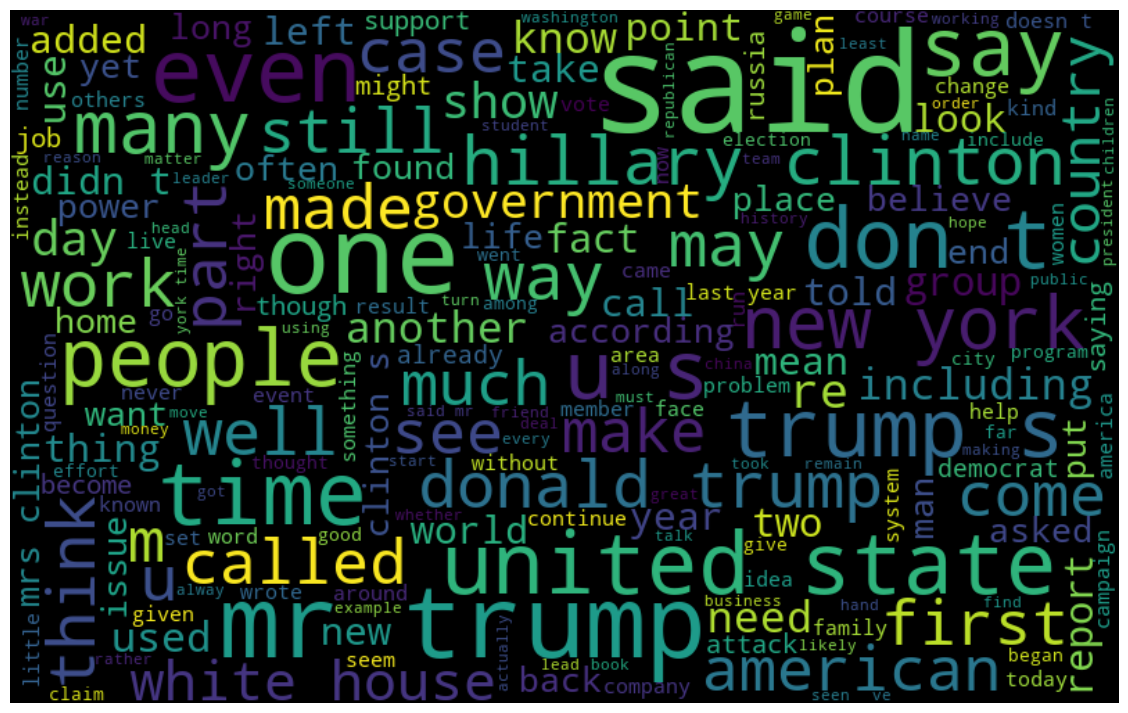

In [12]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_news']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

* Concatenation of all the sentences from <b>clean_news</b> column


* The most frequent words are larger and less frequent words are smaller


* Visualization of frequent words from genuine and fake news

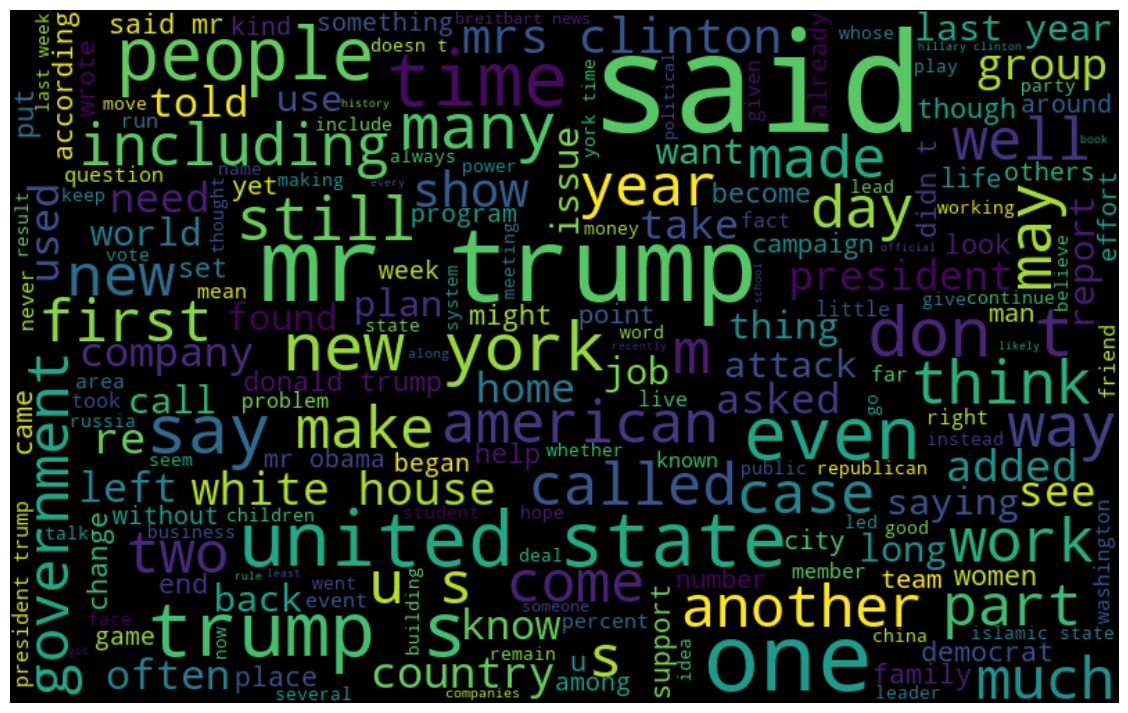

In [13]:
# visualize the frequent words for genuine news
all_words = " ".join([sentence for sentence in df['clean_news'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

* Concatenation of sentences of genuine news only


* Visualization of most frequent words of genuine news

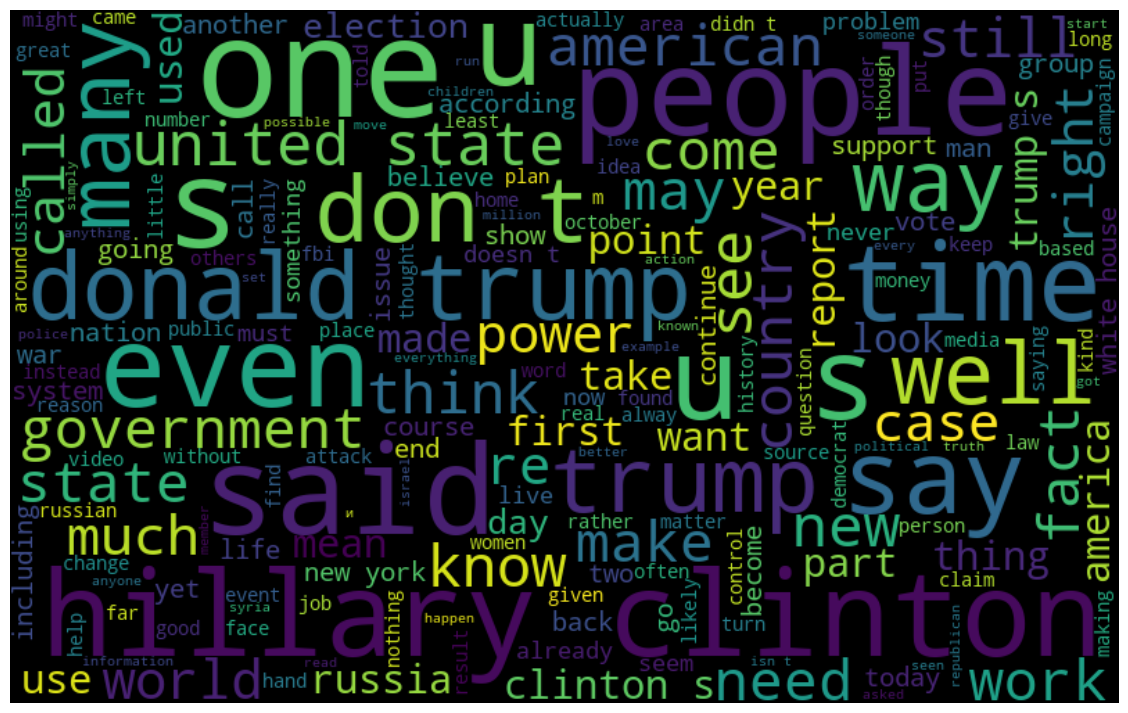

In [14]:
# visualize the frequent words for fake news
all_words = " ".join([sentence for sentence in df['clean_news'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

* Concatenation of sentences of fake news only


* Visualization of most frequent words of fake news


* Compared with the plot of genuine news, there's a difference in the frequency of the words, including different words

## Create Word Embeddings

In [15]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

* <b>Tokenizer</b> - used for loading the text and convert them into a token


* <b>pad_sequences</b> - used for equal distribution of words in sentences filling the remaining spaces with zeros

In [16]:
# tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_news'])
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

239494

* Returns all unique words as tokens


* <b>vocab_size</b> returns the total number of unique words from the data

In [17]:
# padding data
sequences = tokenizer.texts_to_sequences(df['clean_news'])
padded_seq = pad_sequences(sequences, maxlen=500, padding='post', truncating='post')

* Padding the data equalizes the length of all sentences


* For this project we determine the max length to 500 words for faster processing, normally you must find the maximum length of a sentence in the whole dataset

In [18]:
# create embedding index
embedding_index = {}
with open('/kaggle/input/glove6b/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
         values = line.split()
         word = values[0]
         coefs = np.asarray(values[1:], dtype='float32')
         embedding_index[word] = coefs

* Must download the Glove embedding file for this process and place it in the same folder as the notebook


* Glove embedding dictionary contains vectors for words in 100 dimensions, mainly all words from the dictionary

In [19]:
# create embedding matrix
embedding_matrix = np.zeros((vocab_size+1, 100))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
         embedding_matrix[i] = embedding_vector

In [20]:
embedding_matrix[1]

array([ 0.13342001,  0.19998001, -0.25533   , -0.051146  ,  0.11102   ,
        0.31290999,  0.20461001, -0.16978   ,  0.23591   , -0.19870999,
        0.27361   , -0.44758999,  0.15266   ,  0.36144999,  0.042599  ,
       -0.375     ,  0.35876   ,  0.38881999, -0.71937001,  0.45868   ,
       -0.026418  , -0.28536001, -0.30691999, -0.27586001,  0.19926   ,
        0.36140999,  0.11371   , -0.34173   ,  0.44716999,  0.027599  ,
       -0.12358   ,  0.43586001, -0.043002  ,  0.019661  ,  0.0075122 ,
       -0.092998  , -0.14560001,  0.21397001,  0.043995  , -0.78390002,
       -0.082397  , -0.27105001, -0.29763001,  0.18043999, -0.18894   ,
       -0.75373   , -0.23617999,  0.019604  , -0.38022   , -0.10602   ,
       -0.031779  ,  0.37211999,  0.20428   ,  1.02499998, -0.24906   ,
       -2.09050012,  0.12701   ,  0.043019  ,  0.99423999,  0.025519  ,
       -0.12768   ,  0.68374002, -0.45173001, -0.36655   ,  1.12810004,
       -0.16283999,  0.18392999, -0.32929999,  0.73676997, -0.30

* Vectors in the embedding matrix as float32 data type


* The 100 values represents a single word

## Input Split

In [21]:
padded_seq[1]

array([   263,     33,   1664,     98,   5161,  29152,    455,   2398,
         2133,    400,    585,   1649,   5599,     34,     13,    851,
          195,    401,   2018,  18232,    860,  21158,   3122,   2786,
          692,    794,    274,   2102,   3296,  11420,    141,     43,
         2279,  92511,   3242,   3788,   3712,   3296,    857,    174,
         3592,     34,  10160,  58240,   3369,     20,    233,     23,
         3345,  21158,  10415,    618,     12,    526,   2537,   2552,
         8371,    512,    743,   1539,    668,    157,     16,  23486,
          955,  25165,    354,     10,    178,   3833,     60,  11867,
          931,   2822,     19,    890,   5150,    190,     53,   5617,
         2279,   4668,     46,    275,    857,    224,     15,      4,
         2267,     15,      1,   2279,  10160,     67,   8823,  11583,
       125498,  21595,   3905, 125499,  92512, 125500,   5696,  33536,
        28289,   8340,  19700,  75640,   4604,      4,    176,    278,
      

* Visualization of word index from the padded sequence


* Good example viewing a padded sentence, remaining spaces filled with zero to match the max length

Now we proceed in splitting the data for training.

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(padded_seq, df['label'], test_size=0.20, random_state=42, stratify=df['label'])

* 80% data split for training and remaining 20% for testing


* <b>stratify</b> will equally distribute the samples for train and test

## Model Training

In [23]:
from keras.layers import LSTM, Dropout, Dense, Embedding
from keras import Sequential

model = Sequential([
    Embedding(vocab_size+1, 100, weights=[embedding_matrix], trainable=False),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(256),
    Dense(1, activation='sigmoid')
])

* <b>Embedding()</b> - maps the word index to the corresponding vector representation


* <b>LSTM()</b> - process sequence of data


* <b>Dense()</b> - single dimension linear layer


* Use <b>Dropout()</b> if augmentation was not applied on the data to avoid over fitting


* <b>activation='sigmoid'</b> - used for binary classification

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         23949500  
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 24,100,029
Trainable params: 150,529
Non-t

* <b>model.compile()</b> - compilation of the model


* <b>optimizer='adam'</b> - automatically adjust the learning rate for the model over the no. of epochs


* <b>loss='binary_crossentropy'</b> - loss function for binary outputs

In [25]:
# train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/20
65/65 [==============================] - 9s 65ms/step - loss: 0.6327 - accuracy: 0.6373 - val_loss: 0.5897 - val_accuracy: 0.6711
Epoch 2/20
65/65 [==============================] - 3s 50ms/step - loss: 0.6018 - accuracy: 0.6644 - val_loss: 0.5767 - val_accuracy: 0.6858
Epoch 3/20
65/65 [==============================] - 3s 50ms/step - loss: 0.6036 - accuracy: 0.6774 - val_loss: 0.5776 - val_accuracy: 0.7166
Epoch 4/20
65/65 [==============================] - 4s 55ms/step - loss: 0.5878 - accuracy: 0.6745 - val_loss: 0.5877 - val_accuracy: 0.6521
Epoch 5/20
65/65 [==============================] - 3s 50ms/step - loss: 0.6101 - accuracy: 0.6727 - val_loss: 0.7345 - val_accuracy: 0.4910
Epoch 6/20
65/65 [==============================] - 3s 50ms/step - loss: 0.6718 - accuracy: 0.5954 - val_loss: 0.6546 - val_accuracy: 0.6217
Epoch 7/20
65/65 [==============================] - 3s 51ms/step - loss: 0.6333 - accuracy: 0.6335 - val_loss: 0.5897 - val_accuracy: 0.6781
Epoch 8/20
65

* Set the number of epochs and batch size according to the hardware specifications

* Training accuracy and validation accuracy increases each iteration

* Training loss and validation loss decreases each iteration

* The maximum validation accuracy is 95.69 and can be increased further if we increase the number of epochs

Now we visualize the results through a plot graph.

## Plot the results

Now we visualize the results through a plot graph.

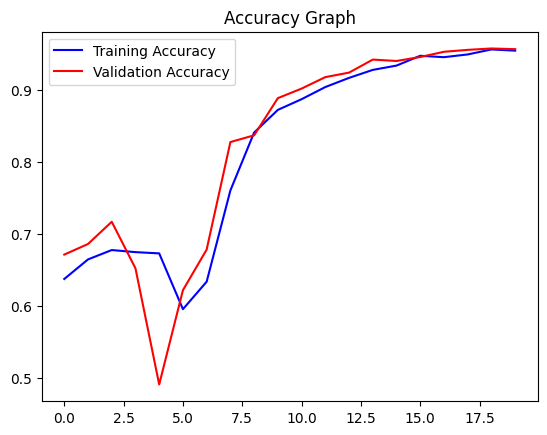

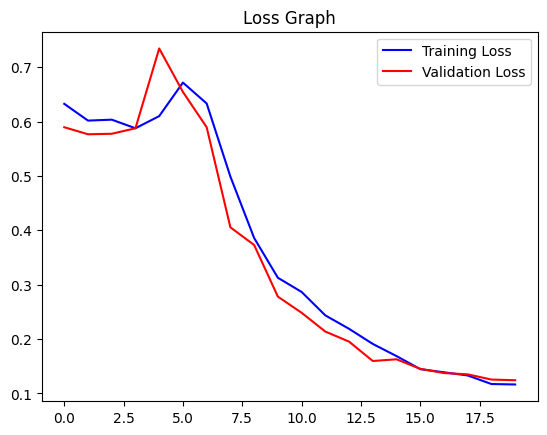

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

## Final Thoughts

* Training the model by increasing the no. of epochs can give better and more accurate results

* Processing large amount of data can take a lot of time and system resource

* Basic deep learning model trained in a small neural network, adding new layers may improve the results

* We can trained a LSTM model to predict the fake news and other models like GRU, Bi-LSTM, Transformers can be used to improve the performance of the model